<a href="https://colab.research.google.com/github/Saoban123/Hamoye-Projects/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [4]:
df.shape

(92016, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


As we can see the FullDate is in the data type Object, So we change it to datetime

In [6]:
df['FullDate'] = pd.to_datetime(df['FullDate'], format= '%Y-%m-%d %H:%M:%S')
df.dtypes

FullDate     datetime64[ns]
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
dtype: object

Now its in datetime , so we can go on

In [7]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [8]:
df = df.set_index('FullDate')

In [9]:
df_sum = df.resample('D').sum()

In [10]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


Question 11

Text(0, 0.5, 'Index')

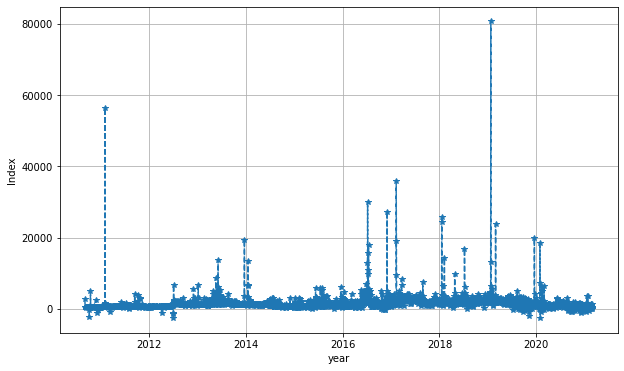

In [11]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_sum.index, df_sum.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'year' )
plt.ylabel( 'Index' )

Question 12

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adf_result = adfuller(df_sum[ 'SysLoad' ])
print( f'p-value: {round(adf_result[ 1 ], 6)} ')

p-value: 0.004254 


In [14]:
adf_result = adfuller(df_sum[ 'GasPrice' ])
print( f'p-value: {round(adf_result[ 1 ], 6)} ')

p-value: 0.045027 


Question 13

In [15]:

adf_result = adfuller(df_sum[ 'GasPrice' ])

print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [16]:
adf_result = adfuller(df_sum[ 'ElecPrice' ])

print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [17]:
df_sum = df_sum.reset_index()
df_sum.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [18]:
D_model = df_sum[['FullDate', 'ElecPrice']]
D_model = D_model.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" }) 
D_model

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [19]:
train_set = D_model[:2757]
test_set = D_model[2757:]
#test_set.shape

In [20]:
from fbprophet import Prophet 

In [21]:
model = Prophet()
model.fit(train_set)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
forecast = model.predict(test_set)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,189.544565,5004.662698,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,427.600312,5116.226357,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,378.619657,5198.638147,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,121.773109,5108.155935,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-137.543914,4678.733053,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [23]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2536.337494,189.544565,5004.662698,2691.764386,2691.764386,2691.764386
1,2018-03-21,2689.655459,427.600312,5116.226357,2692.580955,2692.580955,2692.580955
2,2018-03-22,2788.705741,378.619657,5198.638147,2693.397524,2693.397524,2693.397524
3,2018-03-23,2580.977221,121.773109,5108.155935,2694.214093,2694.214093,2694.214093
4,2018-03-24,2256.367941,-137.543914,4678.733053,2695.030663,2695.030663,2695.030663
...,...,...,...,...,...,...,...
1072,2021-02-24,3475.863766,511.392316,6239.020789,3567.126543,1912.558165,5244.075407
1073,2021-02-25,3542.743730,618.327579,6442.988256,3567.943112,1910.694033,5248.362559
1074,2021-02-26,3309.660718,464.309283,6408.724064,3568.759681,1908.829902,5253.801715
1075,2021-02-27,2966.465610,118.450083,5960.024783,3569.576250,1906.965771,5259.240870


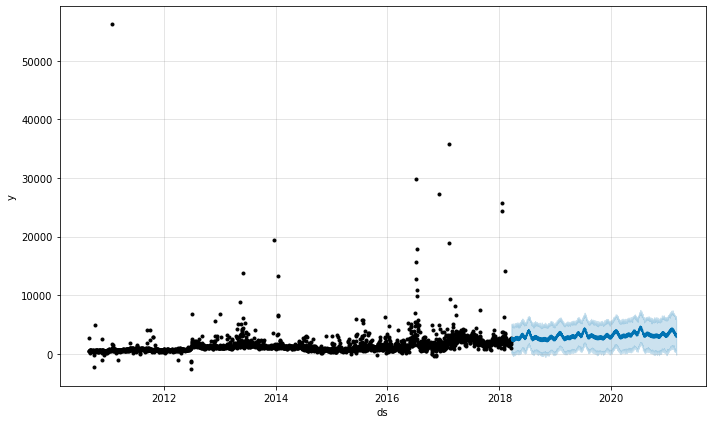

In [57]:
model.plot(forecast)
plt.show()

Question 14 and 15

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def mape(test_set,forecast):
  mape = np.mean(np.abs(((np.array(test_set['y'])) - (np.array(forecast['yhat']))) / (np.array(test_set['y'])))) * 100
  mse = mean_squared_error(test_set['y'], forecast['yhat'])
  rmse = sqrt(mse)
  return f'mape value is: {round(mape,2)} and rmse value is: {round(rmse,2)}'
mape(test_set,forecast) 

'mape value is: 549.48 and rmse value is: 3218.16'

Question 16

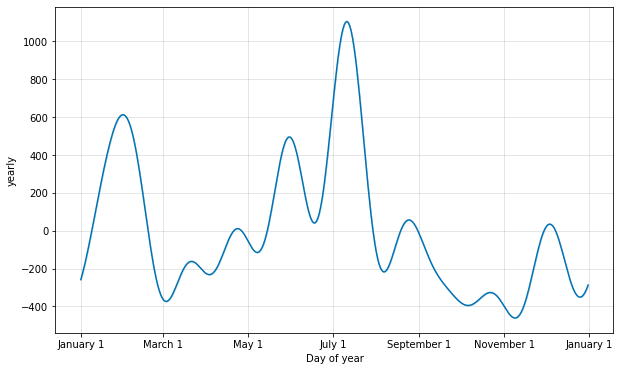

In [26]:
from fbprophet.plot import plot_yearly
plot_yearly(model)

July has the highest month seasonality value

In [27]:
multivariate = df_sum.rename(columns = {'FullDate':'ds','ElecPrice':'y',
                                           'SysLoad':'add1','Tmax':'add2',
                                           'GasPrice':'add3'})
multivariate.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [28]:
train_set2 = multivariate[:2757]
test_set2 = multivariate[2757:]
train_set2.shape

(2757, 5)

In [29]:
model_variate = Prophet()
model_variate.add_regressor('add1')
model_variate.add_regressor('add2')
model_variate.add_regressor('add3')

In [30]:
model_variate.fit(train_set2)
 
forecast2 = model_variate.predict(test_set2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Question 17 and 18

In [70]:
def mape_2(test_set2,forecast2):
  mape2 = np.mean(np.abs(((np.array(test_set2['y'])) - (np.array(forecast2['yhat']))) / (np.array(test_set2['y'])))) * 100
  mse2 = mean_squared_error(test_set2['y'], forecast2['yhat'])
  rmse2 = sqrt(mse2)
  return f'mape value is: {round(mape2,2)} and rmse value is: {round(rmse2,2)}'
mape_2(test_set2,forecast2)

'mape value is: 233.74 and rmse value is: 2709.65'

Question19

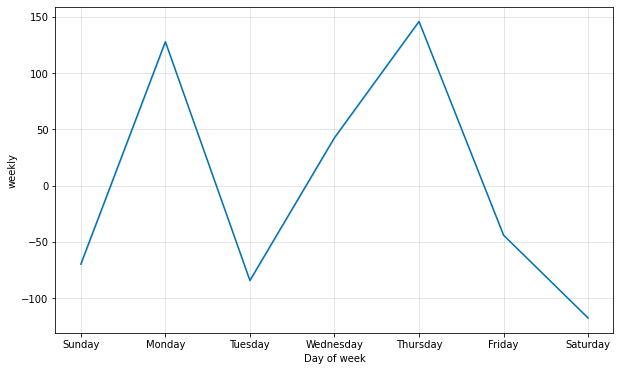

In [32]:
from fbprophet.plot import plot_weekly
plot_weekly(model_variate)

Thursday has the highest seasonality value 

In [33]:
model_variate2 = df_sum.rename(columns = {'FullDate':'ds','ElecPrice':'y','SysLoad':'add1','GasPrice':'add2'})
model_variate2.drop('Tmax', axis=1,inplace=True)

In [34]:
train_set3 = model_variate2[:2757]
test_set3 = model_variate2[2757:]

In [35]:
model_variate2 = Prophet()
model_variate2.add_regressor('add1')
model_variate2.add_regressor('add2')

In [36]:
model_variate2.fit(train_set3)
 
forecast3 = model_variate2.predict(test_set3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Question 20

In [71]:
def mape_3(test_set3,forecast3):
  #mape3 = np.mean(np.abs(np.array(test_set3['y']) - np.array(forecast3.yhat))/ np.array(test_set3['y'])) *100
  mape3 = np.mean(np.abs(((np.array(test_set3['y'])) - (np.array(forecast3['yhat']))) / (np.array(test_set3['y'])))) * 100
  return f'mape value is: {round(mape3,2)}'
mape_3(test_set3,forecast3)

'mape value is: 236.66'